<a href="https://colab.research.google.com/github/sjangnure/CS6643-Computer-Vision/blob/main/Otsu's%20Method/CV_project1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

CV project 1: Extended Otsus Method by sanjana Jangnure (sbj286)

Colab link for the program:
https://colab.research.google.com/drive/19MMLpKAcWhkJJaS_unOYkRbN60vTHgN_?usp=sharing

Instructions to execute: Run each and every cell one after the other. Make sure the file path for input images are according to the path of your input images

Import statements

In [ ]:
import numpy as np
import cv2
from google.colab.patches import cv2_imshow
import matplotlib
import matplotlib.pyplot as plt

Convert the rgb image to grayscale

In [ ]:
def rgb_to_grayscale(input_image,filename): # Convert the image from RGB to gray scale
  
  rgb_weights = [0.299, 0.5870, 0.114]
  grayscale_image = np.dot(input_image[...,:3], rgb_weights)
  grayscale_image=np.rint(grayscale_image)
  return grayscale_image

Create a histogram from the grayscale image

In [ ]:
def create_histogram(grayscale_image):
  # create a histogram of the grayscale_image with grayscale values and its frequency
  gray_values=dict()
  for row in grayscale_image:
    for col in row:
      if col not in gray_values:
        gray_values[col]=1
      else:
        gray_values[col]+=1
  
  return gray_values

Omega (w)= probability of area under the curve belonging to particular region

In [ ]:
def calculate_omega(total_count,count):
  return (count/total_count) if total_count != 0 else 0


Number of pixels in given gray values range

In [ ]:
def calculate_count(start,end,gray_values):
  count=0
  for i in gray_values:
    if i>start and i<=end:        
      count+=gray_values[i]
  return count

Calculate within group variances for given region

In [ ]:
def calculate_sigma(start,end,count,gray_values,mean):
  sigma = 0
  if count==0:
    sigma=0
  else:
    for i in gray_values:
      if i>start and i<=end:
        sigma=sigma+(((i-mean)**2)*gray_values[i])
    sigma=sigma/count
  return sigma

Plot the histogram for grayvalues and their number of pixels

*   X axis = gray values
*   Y axis = count



In [ ]:
def calculate_mean(start,end,count,gray_values):
 # calculate mean for region with (start and end) ranges of threshold
    sum=0
    mean=0
    if count==0:
      return mean
    else:
      for i in gray_values:
        if i>start and i<=end:
            sum+=(gray_values[i]*i)
      mean=sum/count
      return mean

Plot Histogram

In [ ]:
def plot_histogram(gray_values):
  plt.figure(figsize=(15,5))
  plt.bar(gray_values.keys(), gray_values.values(), width=.5)
  plt.xlabel("Gray scale values")
  plt.ylabel("Count")


Otsus Algorithm for 3 thresholds

In [ ]:
%%time
def choose_threshold(gray_values):
  total_count=sum(gray_values.values())
  variance_final=999999
  variance=0
  var_list=[]
  var_dict=dict()
  for t1 in range(0,256):
    variance1=0
    count = calculate_count(-1,t1,gray_values)
    mean = calculate_mean(-1,t1,count,gray_values)
    sigma = calculate_sigma(-1,t1,count,gray_values,mean)
    omega = calculate_omega(total_count,count)
    variance1=(sigma*omega)
    for t2 in range(t1+1,256):
      variance2=0
      a=[t1,t2]
      q=tuple(a)
      if q in var_dict:
        variance2=var_dict[q]
      else:
        count = calculate_count(t1,t2,gray_values)
        mean = calculate_mean(t1,t2,count,gray_values)
        sigma = calculate_sigma(t1,t2,count,gray_values,mean)
        omega = calculate_omega(total_count,count)
        variance2=(sigma*omega)
        var_dict[q]=variance2   
      for t3 in range(t2+1,256):
        variance3=0
        variance4=0
        a=[t2,t3]
        q=tuple(a)
        if q in var_dict:
          variance3=var_dict[q]
        else:
          count = calculate_count(t2,t3,gray_values)
          mean = calculate_mean(t2,t3,count,gray_values)
          sigma = calculate_sigma(t2,t3,count,gray_values,mean)
          omega = calculate_omega(total_count,count)
          variance3=(sigma*omega)
          var_dict[q]=variance3
        a=[t3,256]
        q=tuple(a)
        if q in var_dict:
          variance4=var_dict[q]
        else:
          count = calculate_count(t3,256,gray_values)
          mean = calculate_mean(t3,256,count,gray_values)
          sigma = calculate_sigma(t3,256,count,gray_values,mean)
          omega = calculate_omega(total_count,count)
          variance4=(sigma*omega)
          var_dict[q]=variance4

        variance=variance1+variance2+variance3+variance4
        if variance<variance_final:
          variance_final=variance
          var_list=[t1,t2,t3,variance_final]
  var_list=var_list[0:3]
  print("Threshold values are:",var_list)
  return var_list

       
        

CPU times: user 4 µs, sys: 0 ns, total: 4 µs
Wall time: 6.91 µs


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Create a directory in 'My Drive' called as 'CV_project1' and upload all the test images given for the project.

## Test Image 1:  data13.bmp

In [ ]:
%%time
filename1="data13.bmp"
input_image1 = cv2.imread("/content/drive/My Drive/CV_project1/"+filename1) #read the  input image. It is read in bgr format
input_image1 = cv2.cvtColor(input_image1, cv2.COLOR_BGR2RGB) #Convert to RGB format
grayscale_image1 = rgb_to_grayscale(input_image1,filename1) # Convert to grayscale
gray_values1 = create_histogram(grayscale_image1) #create a histogram from image
var_list1=choose_threshold(gray_values1) # Choose 3 thresholds using Otsus Method


Threshold values are: [76, 154, 221]
CPU times: user 14.6 s, sys: 0 ns, total: 14.6 s
Wall time: 14.8 s


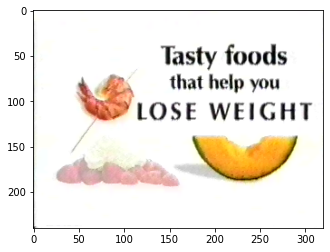

In [ ]:
plt.imshow(input_image1) #Display input image

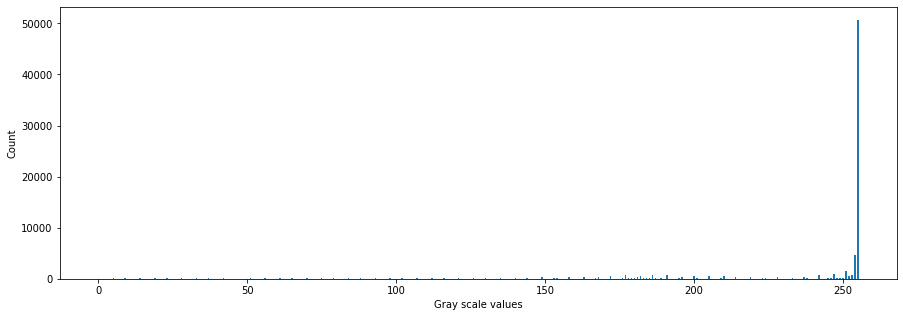

In [ ]:
plot_histogram(gray_values1) #Plot the histogram

(240, 320)


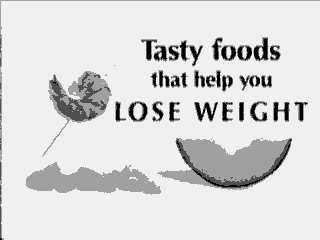

Threshold values are: [76, 154, 221]


In [ ]:
# Display the output image for 4 regions
regions1 = np.digitize(grayscale_image1, bins=var_list1)
regions1=80*regions1
print(regions1.shape)
cv2_imshow(regions1)
cv2.imwrite("/content/"+filename1[:-4]+"_out.bmp",regions1)
print("Threshold values are:",var_list1)

## Test Image 2:   tiger1-24bits.bmp

In [ ]:
%%time
filename2="tiger1-24bits.bmp"
input_image2 = cv2.imread("/content/drive/My Drive/CV_project1/"+filename2) #read the  input image. It is read in bgr format
input_image2 = cv2.cvtColor(input_image2, cv2.COLOR_BGR2RGB) #Convert to RGB format
grayscale_image2 = rgb_to_grayscale(input_image2,filename2) # Convert to grayscale
gray_values2 = create_histogram(grayscale_image2) #create a histogram from image
var_list2=choose_threshold(gray_values2) # Choose 3 thresholds using Otsus Method

Threshold values are: [44, 104, 174]
CPU times: user 11 s, sys: 19.5 ms, total: 11 s
Wall time: 11.3 s


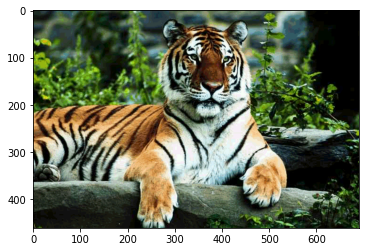

In [ ]:
plt.imshow(input_image2) # Input Image

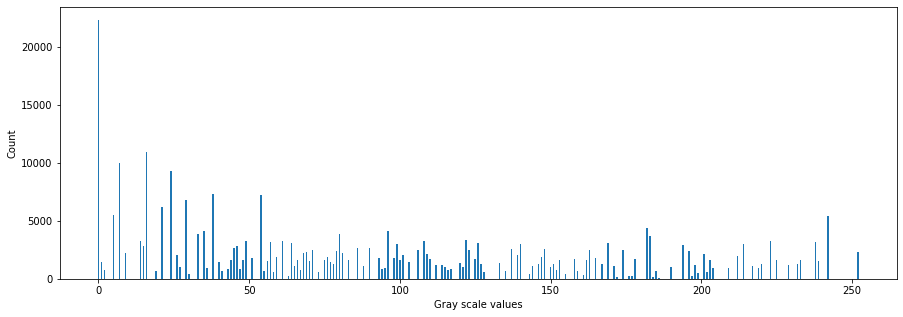

In [ ]:
plot_histogram(gray_values2) # Histogram of input image

(461, 690)


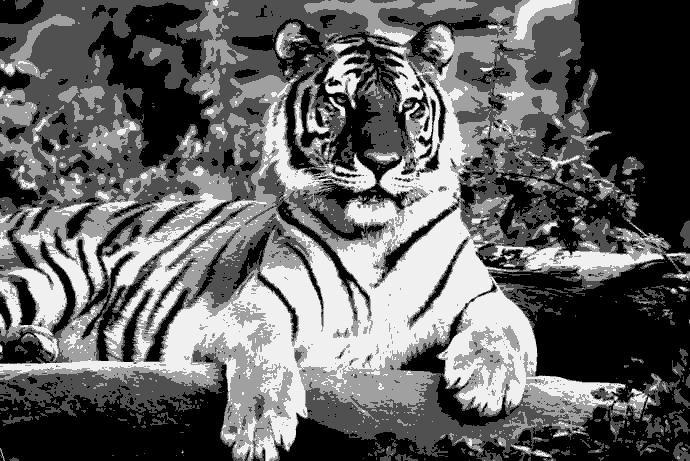

Threshold values are: [44, 104, 174]


In [ ]:
# Display the output image for 4 regions
regions2 = np.digitize(grayscale_image2, bins=var_list2)
regions2=80*regions2
print(regions2.shape)
cv2_imshow(regions2)
cv2.imwrite("/content/"+filename2[:-4]+"_out.bmp",regions2)
print("Threshold values are:",var_list2)

## Test Image 3:   fruits2b.bmp

In [ ]:
%%time
filename3="fruits2b.bmp"
input_image3 = cv2.imread("/content/drive/My Drive/CV_project1/"+filename3) #read the  input image. It is read in bgr format
input_image3 = cv2.cvtColor(input_image3, cv2.COLOR_BGR2RGB) #Convert to RGB format
grayscale_image3 = rgb_to_grayscale(input_image3,filename3) # Convert to grayscale
gray_values3 = create_histogram(grayscale_image3) #create a histogram from image
var_list3=choose_threshold(gray_values3) # Choose 3 thresholds using Otsus Method

Threshold values are: [87, 139, 171]
CPU times: user 15.1 s, sys: 4.84 ms, total: 15.1 s
Wall time: 15.3 s


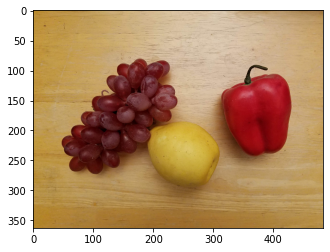

In [ ]:
plt.imshow(input_image3) # Input image

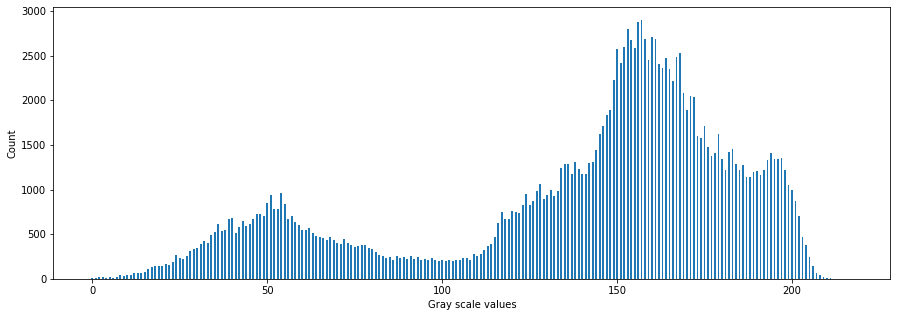

In [ ]:
plot_histogram(gray_values3) #Plot the histogram

(363, 484)


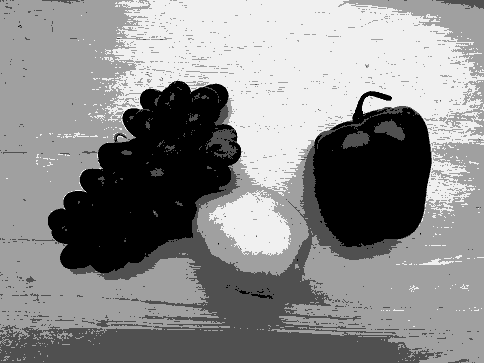

Threshold values are: [87, 139, 171]


In [ ]:
# Display the output image for 4 regions
regions3 = np.digitize(grayscale_image3, bins=var_list3)
regions3=80*regions3
print(regions3.shape)
cv2_imshow(regions3)
cv2.imwrite("/content/"+filename3[:-4]+"_out.bmp",regions3)
print("Threshold values are:",var_list3)